# Customer Churn Prediction for SyriaTel Telecom

## Business Understanding
#### Overview
Loss of existing customers is a major challenge for telecommunications companies like SyriaTel. Acquiring new customers is often more costly than retaining current ones, and high churn rates negatively impact revenue, profitability, and market share. This project aims to leverage historical customer data to predict churn, enabling SyriaTel to take proactive measures that improve customer retention, satisfaction, and competitive positioning.

#### Business Problem
SyriaTel is experiencing significant customer churn, leading to revenue loss and declining market share. Without a clear understanding of churn patterns and high-risk customer segments, the company struggles to develop effective retention strategies.

To address this, the project will:

Predict which customers are likely to churn.

Identify the most important factors driving churn.

Deliver actionable insights to support targeted retention campaigns and improve overall customer loyalty.

## Data Understanding
The dataset used in this project was sourced from Kaggle. It contains customer-level information from a telecom company and is designed for churn prediction analysis.

In this section, I will explore the dataset to assess its structure, features, and data quality. This includes:

- eviewing the number of rows and columns.

- nderstanding data types (numerical vs categorical).

- Identifying missing values or anomalies.

- aining initial insights into class distribution for the target variable (churn).

- his preliminary analysis helps shape the approach for data preprocessing and model development.

In [20]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

In [22]:
# Loading the data

data = pd.read_csv('CustomerChurn-SyriaTel.csv')

In [24]:
#
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [26]:
#Displays the first five rows of the data.
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [28]:
#Knowing the shape of the data
data.shape

(3333, 21)

In [30]:
#Geting general information on tha data and each column.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [32]:
#getting the summary statistics of the columns that contain numerical data.
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## Data Preparation
### Data Cleaning
Data cleaning will involve dropping irrelevant columns, checking for duplicates and missing values and if duplicates or missing values are present in the data, action will be taken and also converting datatypes wherever necessary.

In [35]:
# Drop irrelevant columns

data.drop(columns=['phone number','state', 'area code'], axis=1, inplace=True)

In [37]:
# Check for missing values

data.isna().sum()

account length            0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [39]:
# Encode categorical variables
label_encoder = LabelEncoder()
data['international plan'] = label_encoder.fit_transform(data['international plan']) 
data['voice mail plan'] = label_encoder.fit_transform(data['voice mail plan']) 

# Convert boolean to integer
data['churn'] = data['churn'].astype(int)

## 1. Distribution of categorical data

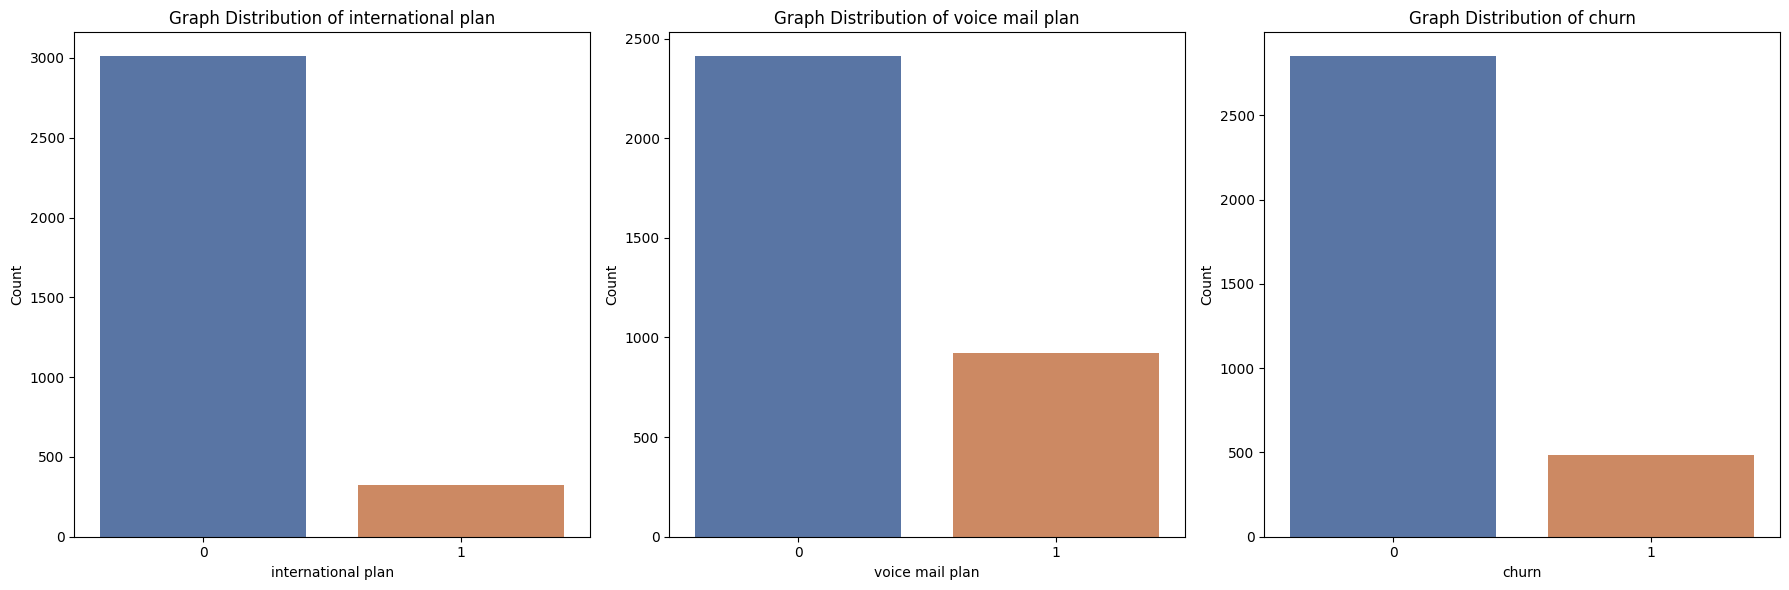

In [42]:
columns = ['international plan', 'voice mail plan', 'churn']
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, col in enumerate(columns):
    sns.countplot(data=data, x=col, hue=col, palette='deep', ax=axes[i], legend=False)
    axes[i].set_title(f'Graph Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()



### From the distribution I noted that:
- The number of customers who stop using SyriaTel are less.
- Majority of the customers have no international plan and voicemail plan.


## 2. Distribution of numerical data

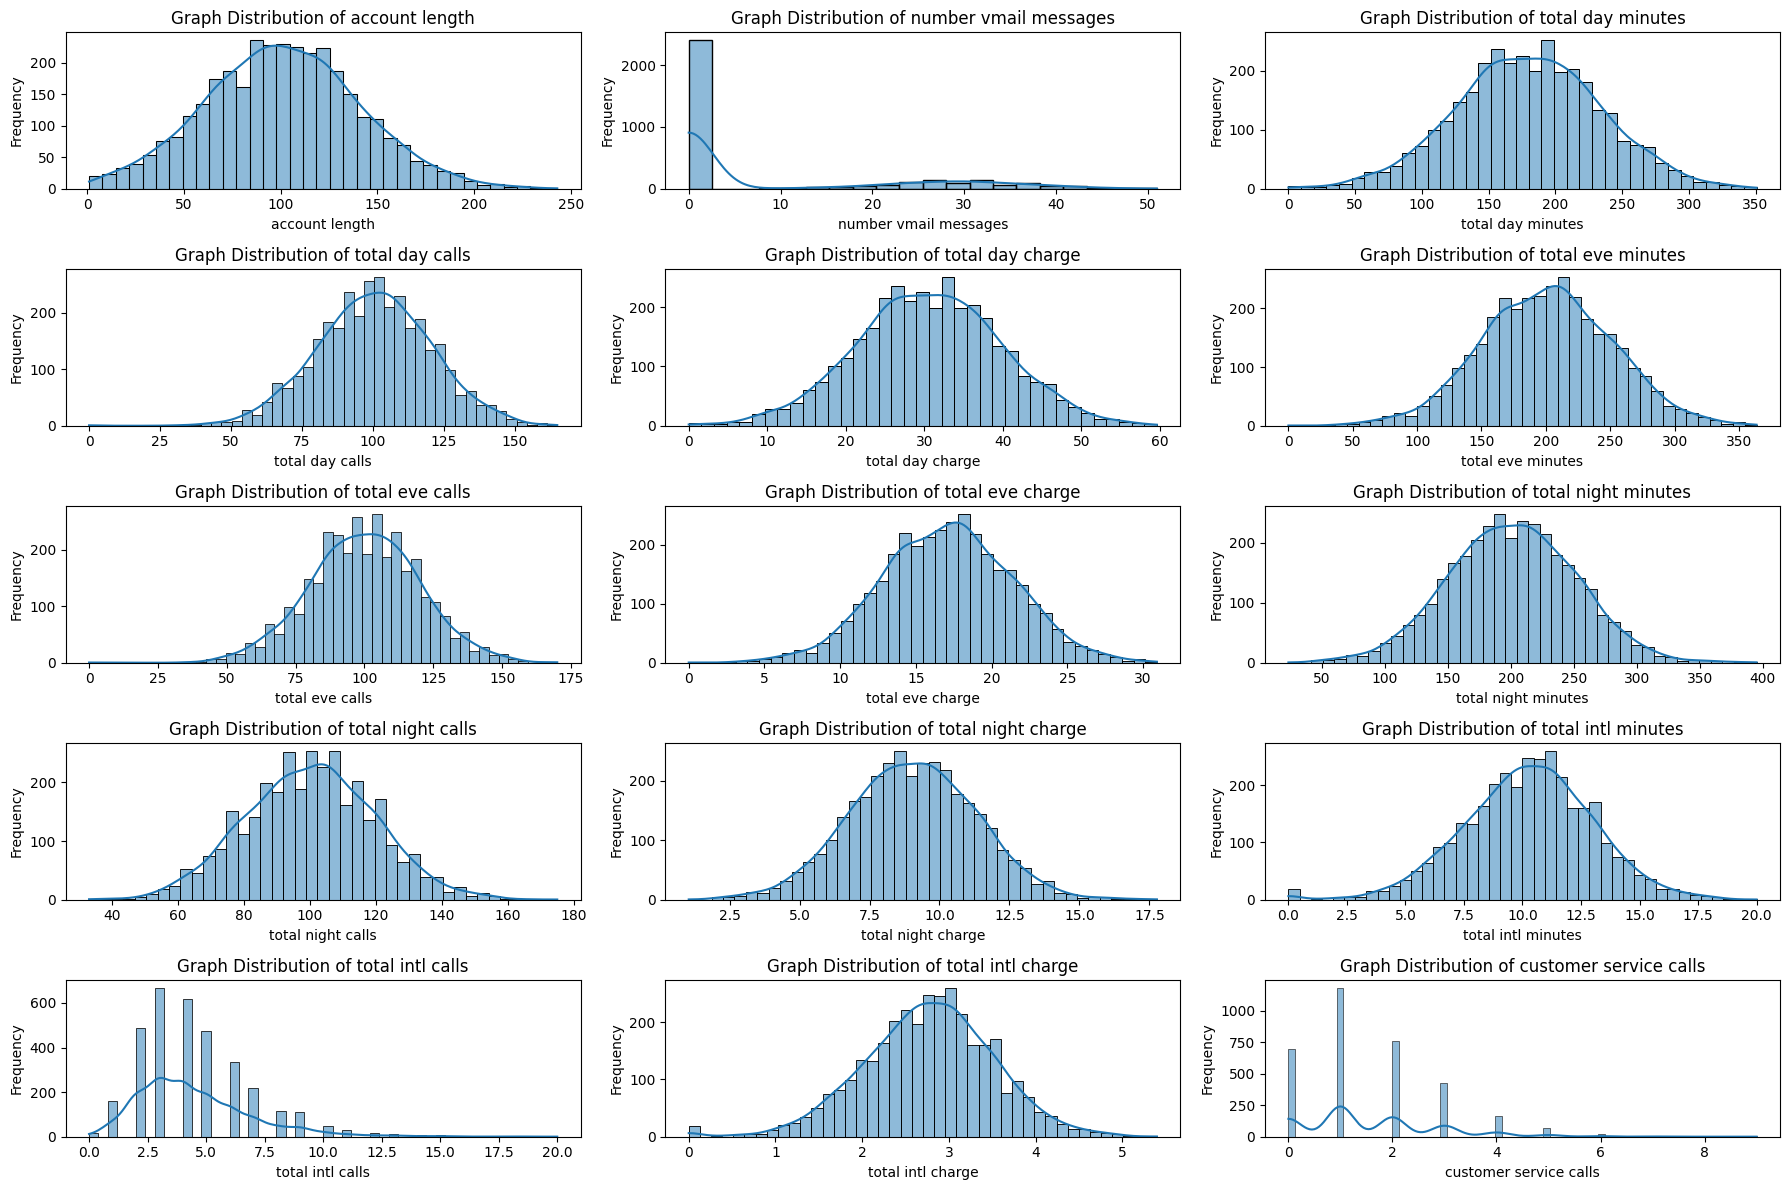

In [46]:
# List of columns with numerical data
columns = data.drop(columns=['voice mail plan', 'international plan', 'churn'], axis=1).columns

fig, axes = plt.subplots(5, 3, figsize=(18, 12))

# Flatten axes array 
axes = axes.flatten()

# Loop through the columns and create histogram plots
for i, col in enumerate(columns):
    sns.histplot(data=data, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Graph Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')  

plt.tight_layout()
plt.show()

- Distribution of total minutes is roughly normal, centered around the mean. Most customers use a moderate amount, with few using very low or very high minutes.

- Distribution of account length is approximately normal, showing a symmetrical spread around the mean. Most customers have an average account lifespan.

- Distribution of number voicemail messages is highly right-skewed, with most customers having 0 messages. Voicemail is rarely used.

- Distribution of total calls is also normal, indicating balanced call usage. Most customers make an average number of calls.

- Distribution of total charge mirrors total minutes, as charges depend on minutes used. Most charges fall within a central range.

- Distribution of customer service calls is right-skewed, with most customers making 0 to 1 call. A few make many calls, especially 4 or more, possibly signaling dissatisfaction linked to churn.

## 3. Distribution of international and voicemail plans by churn

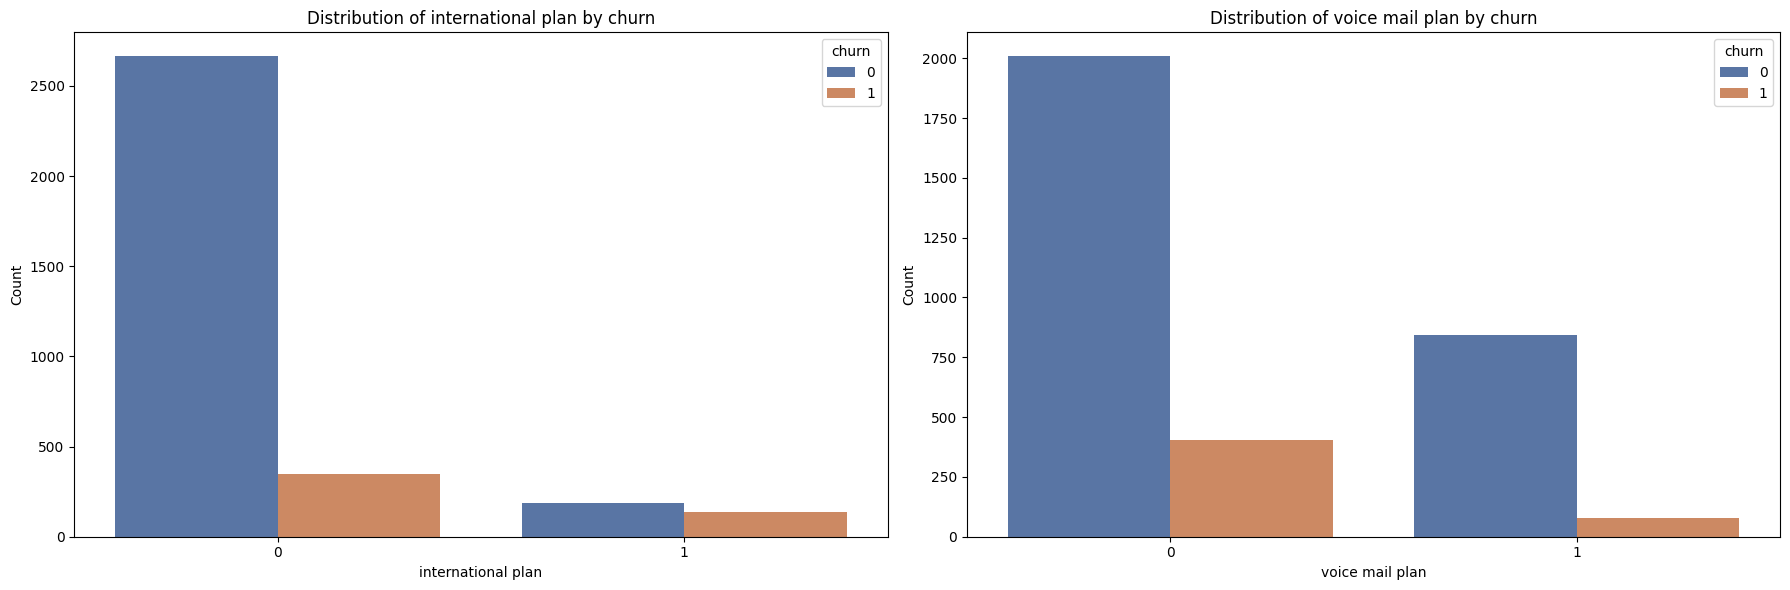

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Loop to create count plots
for i, col in enumerate(['international plan', 'voice mail plan']):
    sns.countplot(data=data, x=col, hue='churn', palette='deep', ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by churn')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


### International plan by churn
Most customers don’t have an international plan, and churn is relatively low among them. However, churn is higher among those with the plan, suggesting a link between having the plan and increased likelihood of churn.

### Voice mail plan by churn
Most customers don’t have a voice mail plan, and while many didn’t churn, a significant number did. Those with a voice mail plan are fewer, but they show a lower churn rate, indicating they are less likely to churn.

## 4. Relationship between churn and columns with numerical data

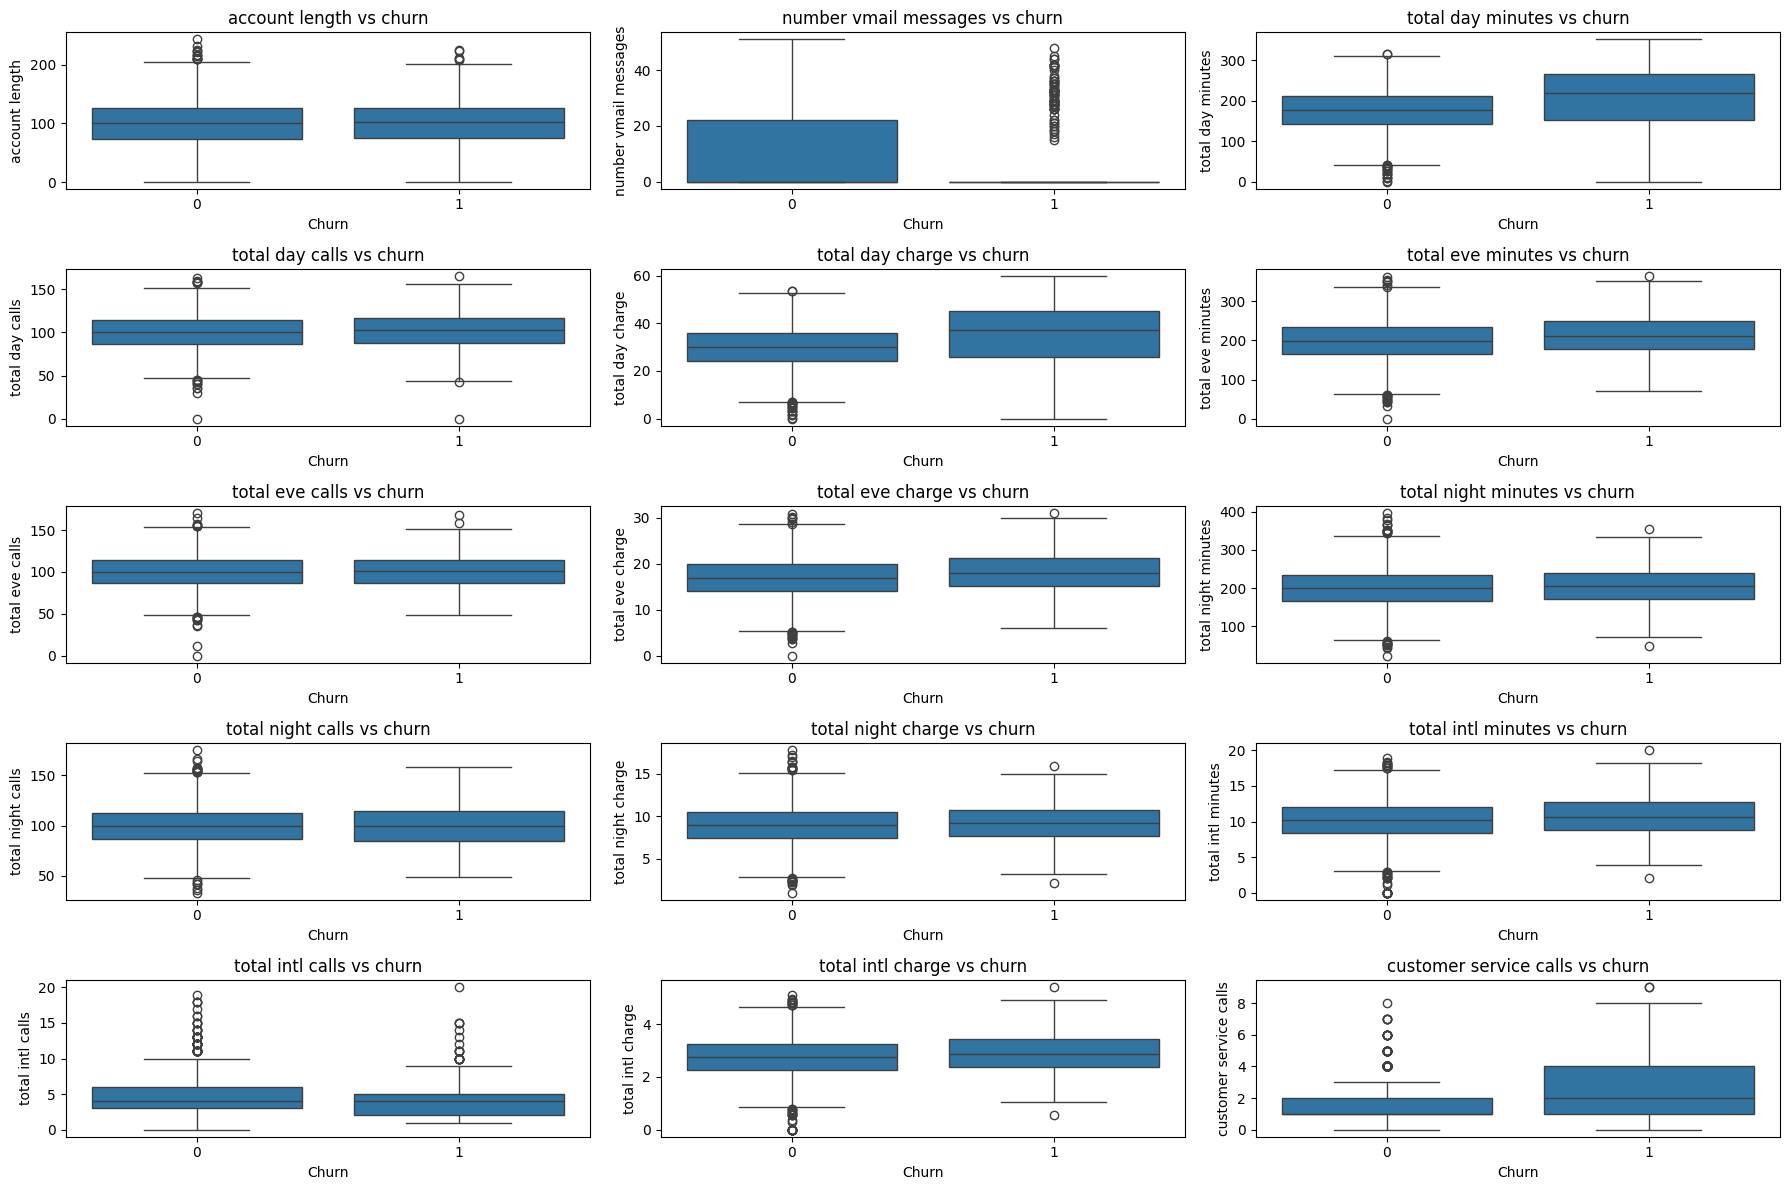

In [54]:
fig, axes = plt.subplots(5, 3, figsize=(18, 12))

# Flatten axes array 
axes = axes.flatten()

# Loop through the columns and create box plots
for i, col in enumerate(columns):
    sns.boxplot(data=data, x='churn', y=col, ax=axes[i])
    axes[i].set_title(f'{col} vs churn')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(f'{col}') 

plt.tight_layout()
plt.show()

#### Total minutes vs churn
Non-churned customers tend to have slightly lower total minutes. Churned customers show a wider range and higher median, suggesting high usage may contribute to churn, possibly due to cost.

#### Total calls vs churn
Distributions are similar across churned and non-churned groups, indicating total calls may not be a key churn indicator.

#### Total charge vs churn
Non-churned customers have lower, more consistent charges. Churned customers face higher and more varied charges, pointing to possible dissatisfaction with billing.

#### Account length vs churn
Churned and non-churned customers have similar account length distributions, suggesting it’s not a strong predictor of churn.
Number of voicemail messages vs churn
#### Number of Voicemail Messages vs churn
Most customers have few voicemail messages, with some outliers at the high end. The distribution is skewed, indicating a small group uses voicemail heavily.

#### Customer service calls vs churn
Non-churned customers rarely contact support. Churned customers show higher and more extreme values, suggesting frequent service calls may signal dissatisfaction leading to churn.

## 5. Correlation Analysis

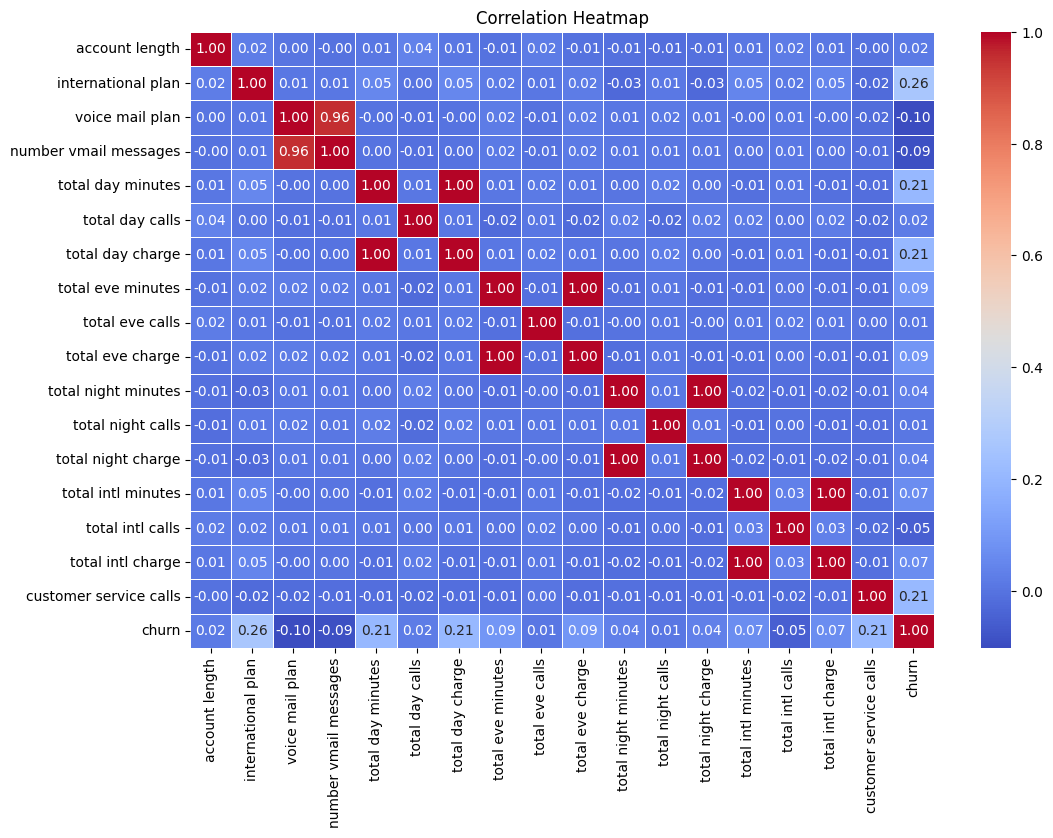

In [58]:
# Plot heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')

plt.show()


Strongly correlated variables like total day minutes and total day charge may be redundant, offering overlapping information.

Variables with strong positive or negative correlation to churn are likely more predictive.

Features with near-zero correlation may be less useful unless they have a non-linear relationship with churn.

In [61]:
# Calculate absolute values of correlations
corr_matrix = data.corr().abs()

# Create an upper triangle matrix to avoid checking the same correlation twice
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns that have correlation higher than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop the columns from the dataframe
data.drop(to_drop, axis=1, inplace=True)

### Train Test Split

In [64]:
# Define features and the target variable
X = data.drop(columns='churn')
y = data['churn']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### SMOTE for Class Imbalance

There is a clear class imbalance in the target variable 'churn', with many more non-churned (0) than churned (1) customers, as shown in graph 1 plot 3. This imbalance may affect model performance, especially for Logistic Regression, which is sensitive to skewed classes.

To address this, I will apply SMOTE to the training data. SMOTE generates synthetic samples for the minority class, helping balance the dataset and improve the model’s ability to predict churn.

In [68]:
# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

C:\Users\HomePC\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


### Standardization
Ensuring that each feature contributes equally to the model.

In [71]:
categorical_columns = ['international plan', 'voice mail plan']
numerical_columns = X.drop(categorical_columns, axis=1).columns

# Initialize StandardScaler
scaler = StandardScaler()

# fit only numerical columns
X_train_scaled = scaler.fit_transform(X_train[numerical_columns])
X_train_scaled_resampled = scaler.transform(X_train_resampled[numerical_columns])
X_test_scaled = scaler.transform(X_test[numerical_columns])

# Combine the scaled numerical columns and categoricalcolumns into one dataframe
X_train_scaled = pd.concat([pd.DataFrame(X_train_scaled, columns=numerical_columns), X_train[categorical_columns].reset_index(drop=True)], axis=1)
X_train_scaled_resampled = pd.concat([pd.DataFrame(X_train_scaled_resampled, columns=numerical_columns), X_train_resampled[categorical_columns].reset_index(drop=True)], axis=1)
X_test_scaled = pd.concat([pd.DataFrame(X_test_scaled, columns=numerical_columns), X_test[categorical_columns].reset_index(drop=True)], axis=1)

#### Logistic Regression Model

In [74]:
# Initialize logistic regression
lr = LogisticRegression(random_state=42)

# Train the model on the resampled dataset
lr.fit(X_train_scaled_resampled, y_train_resampled)

# Make predictions
y_pred_lr = lr.predict(X_test_scaled)
y_pred_proba_lr = lr.predict_proba(X_test_scaled)[:, 1]

In [76]:
# Model Evaluation
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
print(f"Logistic Regression ROC-AUC Score: {roc_auc_lr:.4f}")

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.72      0.81       709
           1       0.31      0.73      0.44       125

    accuracy                           0.72       834
   macro avg       0.62      0.72      0.62       834
weighted avg       0.84      0.72      0.75       834

Logistic Regression ROC-AUC Score: 0.8053


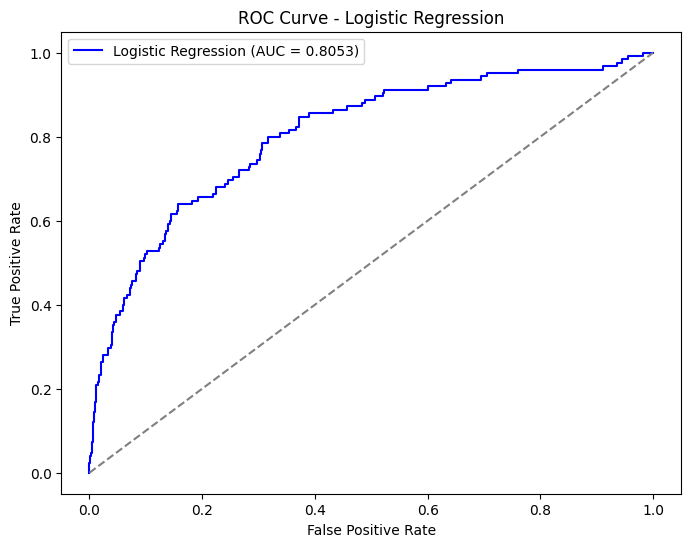

In [78]:
# ROC Curve

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_lr:.4f})", color="blue")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")

plt.legend()
plt.show()

Precision: 94% of predicted non-churn cases were correct, but only 31% of predicted churn cases were true churns. This indicates poor precision for the churn class, with many false positives.

F1 Score: Non-churn class: 0.81 — a good balance between precision and recall.Churn class: 0.44 — low due to poor precision despite decent recall, suggesting the model over-predicts churn.

Accuracy (0.72): Overall, 72% of predictions are correct. However, accuracy alone is misleading in imbalanced datasets.

ROC-AUC Score (0.8053): Indicates strong discriminative ability between churn and non-churn. Closer to 1, which is ideal.

ROC Curve: Shows better-than-random performance, with a decent gap from the diagonal baseline. Indicates moderate to good model performance.

#### Random Forest Classifier

In [82]:
# Initialize random forest
rf = RandomForestClassifier(class_weight="balanced", random_state=42)

# Train the model
rf.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test_scaled)
y_pred_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]

In [84]:
#Model Evaluation
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f"Random Forest ROC-AUC Score: {roc_auc_rf:.4f}")

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       709
           1       0.97      0.60      0.74       125

    accuracy                           0.94       834
   macro avg       0.95      0.80      0.85       834
weighted avg       0.94      0.94      0.93       834

Random Forest ROC-AUC Score: 0.9365


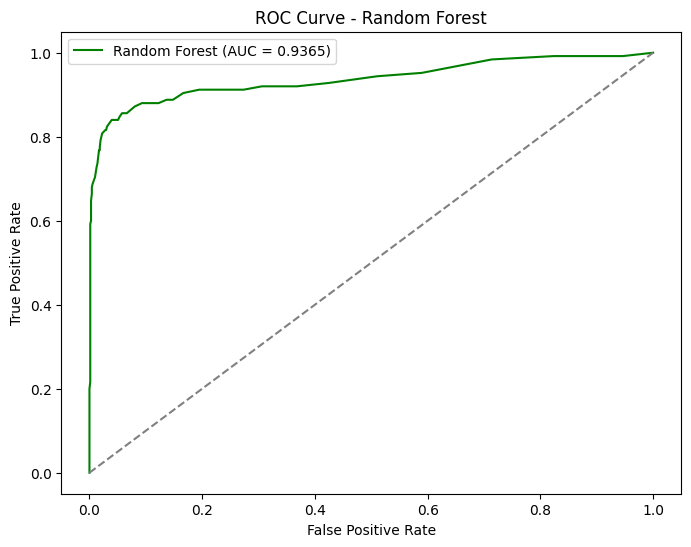

In [86]:
# ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.4f})", color="green")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")

plt.legend()
plt.show()

Precision: 93% of predicted non-churners and 97% of predicted churners were correct. The model is highly accurate when it predicts churn.
F1 Score:Non-churn: 0.96 — excellent overall performance.

Churn: 0.74 — strong, though lower than for non-churn, reflecting missed churn cases despite high precision.

Accuracy (0.94): The model correctly predicts churn status for 94% of customers, indicating strong overall performance.

ROC-AUC Score (0.9365): Excellent ability to distinguish between churners and non-churners, close to the ideal score of 1.

ROC Curve: Hugs the top-left corner, showing high true positive rates with low false positives — a sign of a well-performing model.

### Comparison between the logistic regression model and the random forest classifier

1. Classification Report
Logistic Regression: Performs well on non-churn cases but misses 28% of them (lower recall). It detects 73% of churn cases (high recall), but with low precision—many churn predictions are false positives.

Random Forest: Achieves perfect recall for non-churn cases and high precision for churn predictions. However, it still misses 40% of actual churn cases, showing slightly better precision but similar recall to logistic regression.

2. Overall Accuracy
Logistic Regression: Accuracy is 0.72, reflecting solid performance but limited by class imbalance.

Random Forest: Accuracy is 0.94, indicating strong overall performance, especially in identifying non-churn customers correctly.

3. ROC-AUC Score
Logistic Regression (0.8053): A good score, showing reasonable distinction between churn and non-churn, but room remains to improve recall for churners.

Random Forest (0.9365): Significantly higher AUC, showing excellent capability to separate churn from non-churn cases.

4. ROC Curve
Logistic Regression: ROC curve shows improvement over random guessing, but with a moderate true positive rate.

Random Forest: ROC curve is much closer to the top-left corner, indicating a high true positive rate and low false positive rate—overall stronger performance.

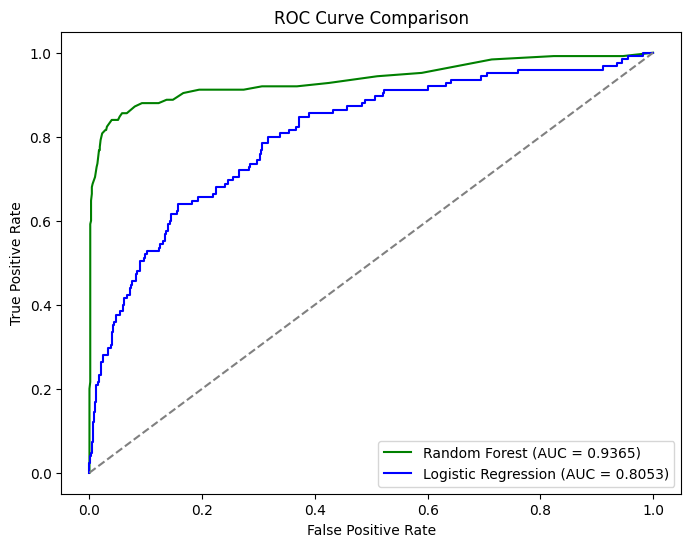

In [91]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.4f})", color="green")
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_lr:.4f})", color="blue")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")

plt.legend()
plt.show()

The closer the ROC curve is to the top-left corner, the better the model's performance. The Random Forest ROC curve consistently lies above that of Logistic Regression.

Random Forest demonstrates a better trade-off between True Positive Rate (Recall) and False Positive Rate, making it the stronger model for churn prediction.

While Logistic Regression performs reasonably well, it is less effective at correctly identifying churn cases compared to Random Forest.

Modelling and Evaluation
I will compare two models:

Logistic Regression – well-suited for binary classification tasks like predicting churn.

Random Forest Classifier – a powerful ensemble method that handles non-linear relationships and feature interactions well.

Model performance will be evaluated using classification metrics: ROC-AUC score, precision, recall, and F1 score. These metrics will help assess how well each model distinguishes between churned and non-churned customers.

### 1. Logistic Regression Model

In [96]:
# Initialize logistic regression
lr = LogisticRegression(random_state=42)

# Train the model on the resampled dataset
lr.fit(X_train_scaled_resampled, y_train_resampled)

# Make predictions
y_pred_lr = lr.predict(X_test_scaled)
y_pred_proba_lr = lr.predict_proba(X_test_scaled)[:, 1]

**Model Evaluation**

In [99]:
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
print(f"Logistic Regression ROC-AUC Score: {roc_auc_lr:.4f}")

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.72      0.81       709
           1       0.31      0.73      0.44       125

    accuracy                           0.72       834
   macro avg       0.62      0.72      0.62       834
weighted avg       0.84      0.72      0.75       834

Logistic Regression ROC-AUC Score: 0.8053


**ROC Curve**

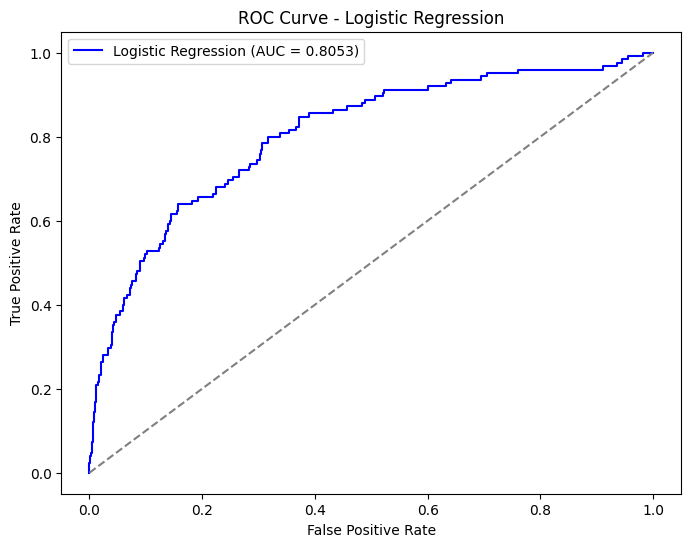

In [102]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_lr:.4f})", color="blue")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")

plt.legend()
plt.show()

- Precision: 94% of predicted non-churn cases were correct, but only 31% of predicted churn cases were true churns. This indicates poor precision for the churn class, with many false positives.

- Recall: 72% of actual non-churn and 73% of actual churn cases were correctly identified. The model is relatively good at detecting churn but misclassifies many non-churn cases as churn.

- F1 Score: Non-churn class: 0.81 — a good balance between precision and recall. Churn class: 0.44 — low due to poor precision despite decent recall, suggesting the model over-predicts churn.

- Accuracy (0.72): Overall, 72% of predictions are correct. However, accuracy alone is misleading in imbalanced datasets.

- ROC-AUC Score (0.8053): Indicates strong discriminative ability between churn and non-churn. Closer to 1, which is ideal.

- ROC Curve: Shows better-than-random performance, with a decent gap from the diagonal baseline. Indicates moderate to good model performance.
- The model performs better on non-churn cases but struggles with churn precision. To improve performance especially on the minority class I will now compare it with a Random Forest Classifier, which may better handle class imbalance and feature interactions.

### 2. Random Forest Classifier

In [106]:
# Initialize random forest
rf = RandomForestClassifier(class_weight="balanced", random_state=42)

# Train the model
rf.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test_scaled)
y_pred_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]

**Model Evaluation**

In [109]:
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f"Random Forest ROC-AUC Score: {roc_auc_rf:.4f}")

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       709
           1       0.97      0.60      0.74       125

    accuracy                           0.94       834
   macro avg       0.95      0.80      0.85       834
weighted avg       0.94      0.94      0.93       834

Random Forest ROC-AUC Score: 0.9365


**ROC curve**

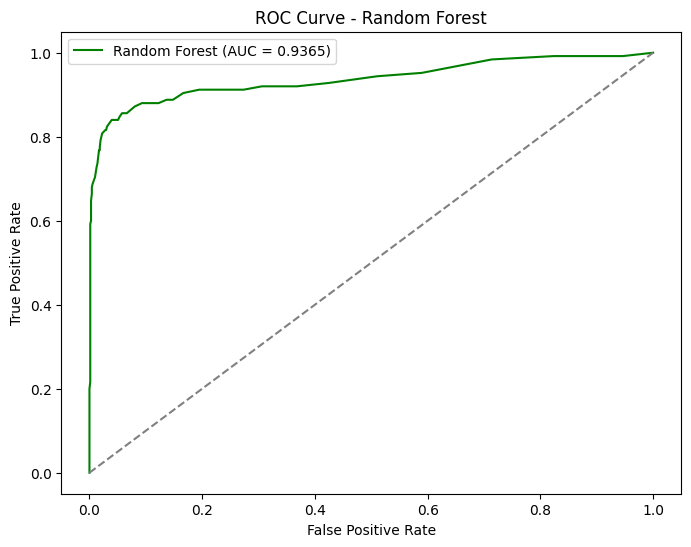

In [112]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.4f})", color="green")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")

plt.legend()
plt.show()


- Precision: 93% of predicted non-churners and 97% of predicted churners were correct. The model is highly accurate when it predicts churn.

- Recall: It correctly identifies all non-churners (100%) but only 60% of actual churners, meaning some churn cases are still missed.

- F1 Score: Non-churn: 0.96 — excellent overall performance. Churn: 0.74 — strong, though lower than for non-churn, reflecting missed churn cases despite high precision.

- Accuracy (0.94): The model correctly predicts churn status for 94% of customers, indicating strong overall performance.

- ROC-AUC Score (0.9365): Excellent ability to distinguish between churners and non-churners, close to the ideal score of 1.

- ROC Curve: Hugs the top-left corner, showing high true positive rates with low false positives — a sign of a well-performing model.
- This indicates that the Random Forest Classifier significantly outperforms the Logistic Regression model, especially in precision and overall discrimination ability, making it a better choice for predicting churn.

### Comparison between the logistic regression model and the random forest classifier

Classification Report:

Logistic Regression: Performs well on non-churn cases but misses 28% of them (lower recall). It detects 73% of churn cases (high recall), but with low precision—many churn predictions are false positives.

Random Forest: Achieves perfect recall for non-churn cases and high precision for churn predictions. However, it still misses 40% of actual churn cases, showing slightly better precision but similar recall to logistic regression.

Overall Accuracy:

Logistic Regression: Accuracy is 0.72, reflecting solid performance but limited by class imbalance.

Random Forest: Accuracy is 0.94, indicating strong overall performance, especially in identifying non-churn customers correctly.

ROC-AUC Score:

Logistic Regression (0.8053): A good score, showing reasonable distinction between churn and non-churn, but room remains to improve recall for churners.

Random Forest (0.9365): Significantly higher AUC, showing excellent capability to separate churn from non-churn cases.

ROC Curve:

Logistic Regression: ROC curve shows improvement over random guessing, but with a moderate true positive rate.

Random Forest: ROC curve is much closer to the top-left corner, indicating a high true positive rate and low false positive rate—overall stronger performance.

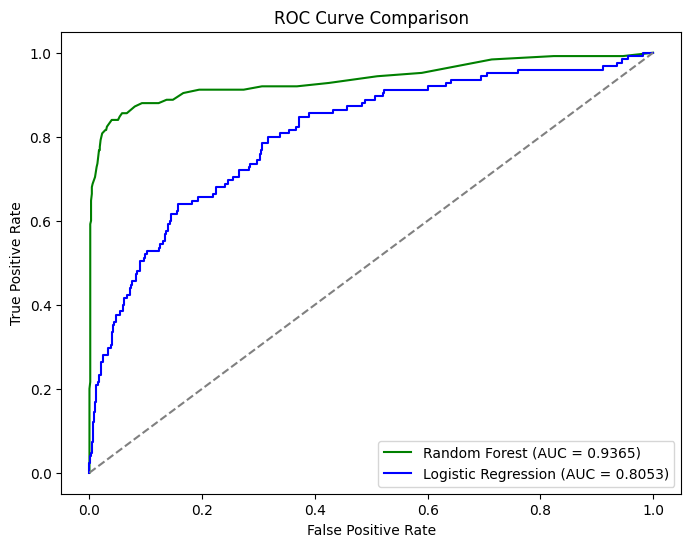

In [117]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.4f})", color="green")
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_lr:.4f})", color="blue")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")

plt.legend()
plt.show()

Random Forest demonstrates a better trade-off between True Positive Rate (Recall) and False Positive Rate, making it the stronger model for churn prediction.
The closer the ROC curve is to the top-left corner, the better the model's performance. The Random Forest ROC curve consistently lies above that of Logistic Regression.
While Logistic Regression performs reasonably well, it is less effective at correctly identifying churn cases compared to Random Forest.

### Conclusion
Logistic Regression performs reasonably well for non-churn cases but struggles with detecting churn, showing low precision and recall for the minority class. It's suitable when simplicity or low computational cost is a priority, but not ideal for imbalanced datasets.

Random Forest delivers more balanced performance across both classes. It handles class imbalance better, with higher precision and recall especially for churn and achieves a significantly higher ROC-AUC score, indicating stronger predictive power and better overall model performance.

### Recommendations
For improved performance across both classes, Random Forest is the preferred model. It offers better handling of class imbalance and superior churn detection, as reflected in its higher ROC-AUC score and classification metrics.
